## Importing required libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Loading Data

We are using the output from SVM Model.


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'svm_label']
# load dataset
pima_svm = pd.read_csv("diabetes_svm.csv", header=0, names=col_names)

In [3]:
pima_svm.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,svm_label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,3,78,50,32,88,31.0,0.248,26,0


In [4]:
pima_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
pregnant     534 non-null int64
glucose      534 non-null int64
bp           534 non-null int64
skin         534 non-null int64
insulin      534 non-null int64
bmi          534 non-null float64
pedigree     534 non-null float64
age          534 non-null int64
svm_label    534 non-null int64
dtypes: float64(2), int64(7)
memory usage: 37.7 KB


## Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [5]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = pima_svm[feature_cols] # Features
y = pima_svm.svm_label # Target variable

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

print('train size is %i'%y_train.shape[0])
print('test size is %i'%y_test.shape[0])

train size is 373
test size is 161


## Building Decision Tree Model
Let's create a Decision Tree Model using Sk-learn.

In [7]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

## Create result file
Let's create a result csv file to use.

In [8]:
print(y_pred)

[1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1]


## Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

report=metrics.classification_report(y_test,y_pred)

clf_name=['Decision Tree','RegLog']

print('Reporting for %s:'%clf_name)

print(report)

Accuracy: 0.8819875776397516
Reporting for ['Decision Tree', 'RegLog']:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       113
           1       0.85      0.73      0.79        48

    accuracy                           0.88       161
   macro avg       0.87      0.84      0.85       161
weighted avg       0.88      0.88      0.88       161



## Visualizing Decision Trees

C:\Users\carla\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


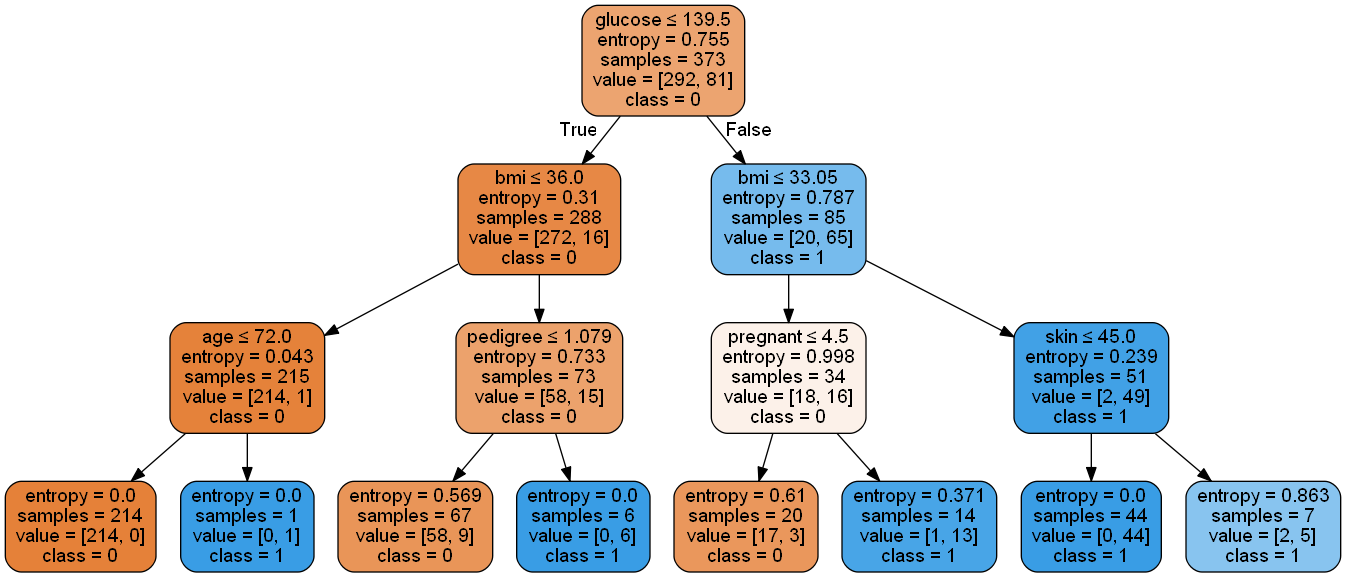

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_svm.png')
Image(graph.create_png())

In [11]:
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(classifier, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2062 ± 0.0506,glucose
0.0323 ± 0.0253,bmi
0.0025 ± 0.0061,pedigree
0 ± 0.0000,age
0 ± 0.0000,insulin
0 ± 0.0000,skin
0 ± 0.0000,bp
-0.0037 ± 0.0290,pregnant


## Creating confusion matrix

In [12]:
dataset = pd.read_csv("diabetes_clean.csv", header=0)
y_dataset_true = dataset['label']

In [13]:
dataset_svm = pd.read_csv("diabetes_svm.csv", header=0)
y_dataset_pred = classifier.predict(dataset_svm.iloc[:,:-1])

from sklearn.metrics import confusion_matrix
confusion_matrix(y_dataset_true, y_dataset_pred)

array([[327,  30],
       [ 94,  83]], dtype=int64)

This model is less complex, explainable and easy to understand.



## Pros
* Decision trees are easy to interpret and visualize.
* It can easily capture Non-linear patterns.
* It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
* It can be used for feature engineering such as predicting missing values, suitable for variable selection.

## Cons
* Sensitive to noisy data. It can overfit noisy data.
* The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
* Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.